In [6]:
%matplotlib inline
import math
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr

from sklearn import tree
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import neighbors
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [7]:
-

In [9]:
df_train = pd.read_csv("titanic_train.csv") 
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
df_train = clean_data(df_train, drop_passenger_id=True)
df_train.head()

,Survived,Pclass,Fare,Sex_Val,Embarked_Val_C,Embarked_Val_Q,Embarked_Val_S,AgeFill,FamilySize
0,0,3,7.2500,1,0,0,1,22.0,1
1,1,1,71.2833,0,1,0,0,38.0,1
2,1,3,7.9250,0,0,0,1,26.0,0
3,1,1,53.1000,0,0,0,1,35.0,1
4,0,3,8.0500,1,0,0,1,35.0,0


In [11]:
#Convert the DataFrame to a numpy array:
train_data = df_train.values
train_data

array([[  0.    ,   3.    ,   7.25  , ...,   1.    ,  22.    ,   1.    ],
       [  1.    ,   1.    ,  71.2833, ...,   0.    ,  38.    ,   1.    ],
       [  1.    ,   3.    ,   7.925 , ...,   1.    ,  26.    ,   0.    ],
       ..., 
       [  0.    ,   3.    ,  23.45  , ...,   1.    ,  21.5   ,   3.    ],
       [  1.    ,   1.    ,  30.    , ...,   0.    ,  26.    ,   0.    ],
       [  0.    ,   3.    ,   7.75  , ...,   0.    ,  32.    ,   0.    ]])

In [12]:
# Training data features, skip the first column 'Survived'
X = train_data[:, 1:]
X[:5]

array([[  3.    ,   7.25  ,   1.    ,   0.    ,   0.    ,   1.    ,
         22.    ,   1.    ],
       [  1.    ,  71.2833,   0.    ,   1.    ,   0.    ,   0.    ,
         38.    ,   1.    ],
       [  3.    ,   7.925 ,   0.    ,   0.    ,   0.    ,   1.    ,
         26.    ,   0.    ],
       [  1.    ,  53.1   ,   0.    ,   0.    ,   0.    ,   1.    ,
         35.    ,   1.    ],
       [  3.    ,   8.05  ,   1.    ,   0.    ,   0.    ,   1.    ,
         35.    ,   0.    ]])

In [13]:
# 'Survived' column values
y = train_data[:, 0]
y[:5]

array([ 0.,  1.,  1.,  1.,  0.])

In [30]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)

In [17]:
# http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

Automatically created module for IPython interactive environment


In [29]:
MLPClassifier??

In [22]:
clf = MLPClassifier()
clf.fit(train_x, train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [23]:
pred_target = clf.predict(test_x)

print(metrics.precision_score(test_y, pred_target, average='weighted'))
print(metrics.recall_score(test_y, pred_target, average='weighted'))
print(metrics.f1_score(test_y, pred_target, average='weighted'))
print(metrics.accuracy_score(test_y, pred_target))
print(metrics.precision_recall_fscore_support(test_y, pred_target))

0.808623406389
0.810055865922
0.808916808615
0.810055865922
(array([ 0.83333333,  0.76923077]), array([ 0.86363636,  0.72463768]), array([ 0.84821429,  0.74626866]), array([110,  69]))


In [24]:
train_pred = clf.predict(train_x)
test_pred = clf.predict(test_x)

In [25]:
print(metrics.accuracy_score(train_y, train_pred))
print(metrics.accuracy_score(test_y, test_pred))

0.808988764045
0.810055865922


In [26]:
cm = confusion_matrix(test_y, test_pred)
print(cm)

[[95 15]
 [19 50]]


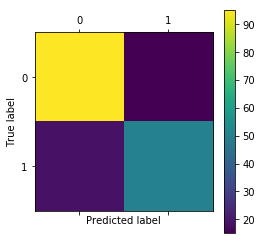

In [27]:
plt.close('all')
plt.figure(figsize=(8, 6))
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [28]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            test_pred, 
                            target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.83      0.86      0.85       110
    Survived       0.77      0.72      0.75        69

 avg / total       0.81      0.81      0.81       179




learning on dataset titanic
training: constant learning-rate
Training set score: 0.813692
Training set loss: 0.429995
training: constant with momentum
Training set score: 0.823793
Training set loss: 0.432105
training: constant with Nesterov's momentum
Training set score: 0.823793
Training set loss: 0.419557
training: inv-scaling learning-rate
Training set score: 0.626263
Training set loss: 0.614437
training: inv-scaling with momentum
Training set score: 0.789001
Training set loss: 0.474915
training: inv-scaling with Nesterov's momentum
Training set score: 0.789001
Training set loss: 0.474316
training: adam
Training set score: 0.828283
Training set loss: 0.409360


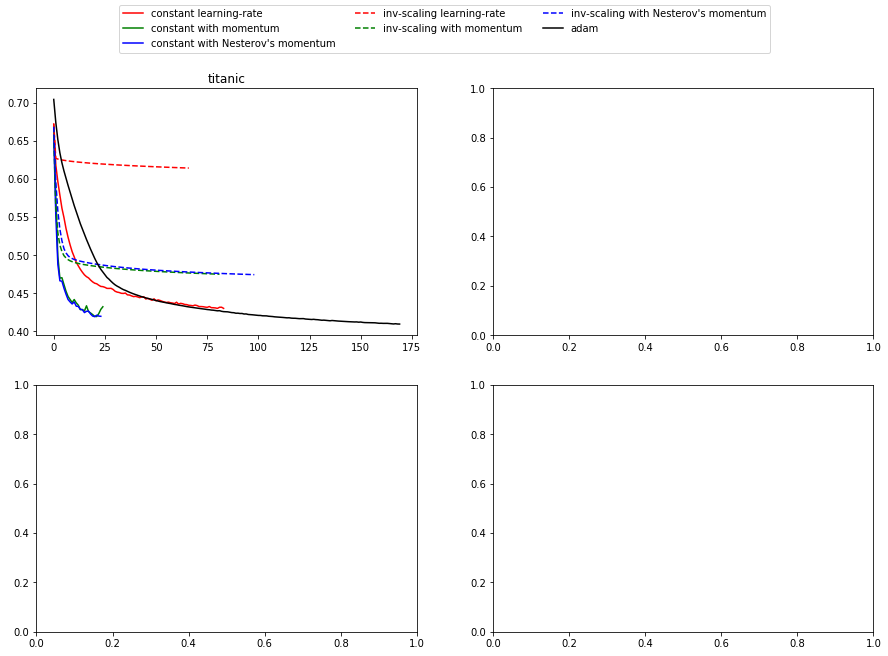

In [46]:
# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'momentum': .9, 'nesterovs_momentum': True,
           'solver': 'adam', 'learning_rate_init': 0.001}]

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)
    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 200

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=max_iter, **param)
        mlp.fit(X, y)
        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
            ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
data_sets = [(X, y)]

for ax, data, name in zip(axes.ravel(), data_sets, ['titanic']):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels=labels, ncol=3, loc="upper center")
plt.show()